<font ><b><h1 style="font-size:3em;"><center>CHAPTER 2</center></h1></b>

# Contents
1. Problem Statement
2. Theory
    1. The mean-field induction equation
    2. Solving in cylindrical coordinates
    3. Calculation of total magnetic field magnitude and pitch angle
    4. Magnetic decay constant
4. Numerical solution to Galactic Magnetic Fields
    1. Solver: Crank-Nicholson
    2. Defining the grid 
    3. Boundary conditions

THE CODE
1. Example 1 - Simplest case ($B_r>0$ and $B_\phi>0$ at all times)
2. Example 2 - ($B_\phi>0$ at all times)
3. Example 3 - Arbitrary seed field

<hr><hr>

# 2.1 - Problem Statement

Solve the mean-field $\alpha-\Omega$ dynamo equations in the kinematic regime. That is, include the $\Omega$ effect term in the equation for $\dfrac{\partial \bar{B}_\phi}{\partial t}$ and the $\alpha$ effect term in the equation for $\dfrac{\partial \bar{B}_r}{\partial t}$. This requires specifying the overall magnitude and spatial dependence of $\Omega$ and $\alpha$.
* Repeat the investigation you had done for task 1, with the new equations, for different values of the dynamo number, $D$
$$ D = − \dfrac{\alpha_0 q \Omega h^3}{\eta_t^2} $$
where $q = − \dfrac{d \ln \Omega}{d \ln r}$ and $\alpha_0 > 0$ is the amplitude of the $\alpha$ effect. Note that $q > 0$ if $\Omega$ decreases with $r$, which is generally the case in galaxies, so $D < 0$.
* The exponential decay becomes exponential growth if $|D| > |D_c|$, where $D_c$ is the critical dynamo number. Find the critical dynamo number numerically (ideally, you would automate this feature).
* Compare the growth rate you obtain for a given value of $D$ (for $|D| > |D_c|$) with the no-z solution prediction for the local growth rate $\gamma$. Do the same comparison for $D_c$ . Do the results agree with your expectations?

<hr><hr>

# 2.2 - Theory

In the previous chapter, we studied how the galactic magnetic field varies with time in the $z$-direction. For that we covered the diffusion equation, its numerical solution using Crank-Nicholson method and some example seed fields, and finally calculated the decay rate.

## 2.2.1 - The mean-field induction equation

In this chapter, we will begin with the kinematic regime of the solutions, beginning with the addition of the $\alpha-\Omega$ term in uor equations. Lets revisit the mean-field induction equation.


$$ \dfrac{\partial \bar{\mathbf{B}}}{\partial t} = \nabla \times \left[ \bar{\mathbf{V}} \times \bar{\mathbf{B}} + \mathcal{E} - \eta \left( \nabla \times \bar{\mathbf{B}} \right) \right] $$
where $\mathcal{E} = \left( \alpha \bar{\mathbf{B}} \right) - \eta_t \left( \nabla \times \bar{\mathbf{B}} \right)$

We will solve the equations in the cylindrical coordinates (r, $\phi$, z) with the origin at the galactic centre and the z-axis parallel to the galactic angular velocity. However, to simplify things, lets make some approximations again.

1. Consider $\bar{V}$ to be of this form, taking $\eta_T = \eta + \eta_t$,
$$ \mathbf{\bar{V}} = \bar{V}_r(r) \mathbf{\hat{r}} + r \Omega(r) \mathbf{\hat{\phi}} + \bar{V}_z(r, z) \mathbf{\hat{z}} $$


2. Take $\eta_T$ independent of $\bar{\mathbf{B}}$. Our equation becomes
But $\nabla \times \left( \nabla \times \bar{\mathbf{B}} \right) = \nabla \left( \nabla \cdot \bar{\mathbf{B}} \right) - \nabla^2 \bar{\mathbf{B}} $ and $\nabla \cdot \bar{\mathbf{B}} = 0$ (Gauss's Law). So we get,

$$ \boxed{ \dfrac{\partial \bar{\mathbf{B}}}{\partial t} = \nabla \times \left( \bar{\mathbf{V}} \times \bar{\mathbf{B}} \right) + \nabla \times \left(\alpha \bar{\mathbf{B}} \right) - \eta_T \left( \nabla \times \nabla \times \bar{\mathbf{B}} \right) } $$

3. Solving again in cylindrical coordinates and taking azimuthal symmetry, we can write the equations for $\bar{B}_r$ and $\bar{B}_{\phi}$ as

$$ \frac{\partial \bar{B}_r}{\partial t} = V_r \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \eta_T \left[ \frac{\partial^2 \bar{B}_r}{\partial z^2} + \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_r \right) \right) \right] $$

$$ \frac{\partial \bar{B}_\phi}{\partial t} = r \Omega \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_\phi)}{\partial z} - \frac{\partial (V_r \bar{B}_\phi)}{\partial r} + \frac{\partial (r \Omega \bar{B}_r)}{\partial r} + \frac{\partial (\alpha \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_z)}{\partial r} + \eta_T \left[ \frac{\partial^2 \bar{B}_\phi}{\partial z^2} + \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_\phi \right) \right) \right] $$

4. Taking the $\alpha-\Omega$ approximation and putting the value $q = -\dfrac{\partial \ln \Omega}{\partial \ln r} = -\dfrac{r}{\Omega} \dfrac{\partial \Omega}{\partial r}$ we obtain

$$ \frac{\partial \bar{B}_r}{\partial t} = - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} $$
$$ \frac{\partial \bar{B}_\phi}{\partial t} = -q \Omega \bar{B}_r + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} $$

Here we have neglected all terms which involved $\dfrac{\partial}{\partial r}$ in $B$. We have also omitted the $\alpha^2$ term for now.

5. Finally consider $\alpha$ to be independent of $z$. So our final equations are

$$ \boxed{ \frac{\partial \bar{B}_r}{\partial t} = - \alpha\frac{\partial (\bar{B}_\phi)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2}} \qquad \qquad \text{and} \qquad \qquad \boxed{ \frac{\partial \bar{B}_\phi}{\partial t} = -q \Omega \bar{B}_r + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} } $$

<hr>

## 2.2.2 - Dynamo number

The dynamo number is defined as 

$$ D = − \dfrac{\alpha_0 q \Omega h^3}{\eta_t^2} $$
Here $h$ pc is the thickness of the thin disk of the galaxy, $\alpha$ is the  and $\Omega$ is the rotation rate fo the galaxy. 

One can parameterize $\Omega$ as
$$ \Omega = \dfrac{\Omega_0}{\sqrt{1 + \left( \dfrac{r}{r_0} \right)^2 }} $$
where $r_0$ is the radius of the galaxy.

With values $\alpha = $, $h = $, $\Omega = $, the critical dynamo number can calculated as 


# 2.3 - Numerical Solution to Galactic magnetic Fields



Now we begin to solve the equations numerically. 


## 2.3.1 - Solver: Crank-Nicholson (modified for coupled equations)

We had used the Crank-Nicholson method for solving the 1D diffusion equation in the previous chapter, however, things get complicated when we mpove to coupled diffusion equations, like in this case. Let us understand the discretization scheme for coupled diffusion equations.

Let $\bar{B}_r = P$ and $\bar{B}_\phi = Q$ for understanding purposes. Our equations modify to
$$ \frac{\partial P}{\partial t} = - \alpha \frac{\partial Q}{\partial z} + \eta_T \frac{\partial^2 P}{\partial z^2} $$
$$ \frac{\partial Q}{\partial t} = -q \Omega P + \eta_T \frac{\partial^2 Q}{\partial z^2} $$

Lets first discretize equations,
$$ \frac{P^{j+1}_{i} - P^{j}_{i}}{dt} = -\dfrac{\alpha}{2} \: \left( \frac{Q^{j+1}_{i+1} - Q^{j+1}_{i}}{dz} + \frac{Q^{j}_{i+1} - Q^{j}_{i}}{dz} \right) \dfrac{\eta_T}{2} \: \left( \dfrac{P^{j+1}_{i+1} - 2P^{j+1}_{i} + P^{j+1}_{i-1}}{dz^2} + \dfrac{P^{j}_{i+1} - 2P^{j}_{i} + P^{j}_{i-1}}{dz^2} \right) $$
and 
$$ \frac{Q^{j+1}_{i} - Q^{j}_{i}}{dt} = -q\Omega P^{j+1}_{i} + \dfrac{\eta_T}{2} \: \left( \dfrac{Q^{j+1}_{i+1} - 2Q^{j+1}_{i} + Q^{j+1}_{i-1}}{dz^2} + \dfrac{Q^{j}_{i+1} - 2Q^{j}_{i} + Q^{j}_{i-1}}{dz^2} \right) $$

Putting $\dfrac{\alpha \: dt}{2 \: dz} = \mu$ and $\dfrac{\eta_T \: dt}{2 \: dz^2} = \nu$, we separate the present time-step $(j+1)$ and the past time-step $(j)$ as
$$ \left(1+2\nu \right) P^{j+1}_{i} - \nu  P^{j+1}_{i+1} - \nu P^{j+1}_{i-1} + \mu Q^{j+1}_{i+1} - \mu Q^{j+1}_{i} = \left(1-2\nu \right) P^{j}_{i} + \nu  P^{j}_{i+1} + \nu P^{j}_{i-1} - \mu Q^{j}_{i+1} + \mu Q^{j}_{i} $$
and 
$$ \left(1+2\nu \right) Q^{j+1}_{i} - \nu  Q^{j+1}_{i+1} - \nu Q^{j+1}_{i-1} + dt \: q \Omega P^{j+1}_{i} = \left(1-2\nu \right) Q^{j}_{i} + \nu  P^{j}_{i+1} + \nu P^{j}_{i-1} $$



Let $U = \left[ P \:\: Q\right]^T$
This whole coupled equation can be simplified to single variable $U$ as
$$ \left[\begin{array}{cc}1+2 \nu & -\mu \\ dt\: q \Omega & 1+2 \nu \end{array}\right] U^{j+1}_{i} 
+ \left[\begin{array}{cc}-\nu & \mu \\ 0 & -\nu \end{array}\right] U^{j+1}_{i+1} 
+ \left[\begin{array}{cc}-\nu & 0 \\ 0 & -\nu \end{array}\right] U^{j+1}_{i-1} 
= \left[\begin{array}{cc}1-2 \nu & \mu \\ 0 & 1-2 \nu \end{array}\right] U^{j}_{i} 
+ \left[\begin{array}{cc}\nu & -\mu \\ 0 & \nu \end{array}\right] U^{j}_{i+1} 
+ \left[\begin{array}{cc}\nu & 0 \\ 0 & \nu \end{array}\right] U^{j}_{i-1} $$

Renaming these $2 \times 2$ matrices $E$, $F$, $G$, $H$, $I$ and $J$ from left to right respectively, we can write it as 
$$ E U^{j+1}_{i} + F U^{j+1}_{i+1} + G U^{j+1}_{i-1} = H U^{j}_{i} + I U^{j}_{i+1} + J U^{j}_{i-1} $$

Again we can now form the final matrix, however, this time, it is a bit different.
$$ \widetilde{M}U^{j+1} = \widetilde{N}U^{j} $$
Here, the final matrices $\widetilde{M}$ and $\widetilde{N}$ are the tensor product of the above 6 matrices and the M, N matrices from the previous chapter. The final matrix would look something like this



$$ \widetilde{M} = \left[\begin{array}{cc} \left[\begin{array}{ccccc}1+2 \nu & -\nu & 0 & \cdots & 0 \\ -\nu & 1+2 \nu & -\nu & \ddots & \vdots \\ 0 & -\nu & 1+2 \nu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\nu \\ 0 & \cdots & 0 & -\nu & 1+2 \nu\end{array}\right] & 
\left[\begin{array}{ccccc}-\mu & \mu & 0 & \cdots & 0 \\ 0 & -\mu & \mu & \ddots & \vdots \\ 0 & 0 & -\mu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \mu \\ 0 & \cdots & 0 & 0 & -\mu \end{array}\right] \\ & \\
\left[\begin{array}{ccccc} dt\: q \Omega & 0 & 0 & \cdots & 0 \\ 0 & dt\: q \Omega & 0 & \ddots & \vdots \\ 0 & 0 & dt\: q \Omega & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & 0 \\ 0 & \cdots & 0 & 0 & dt\: q \Omega \end{array}\right] & 
\left[\begin{array}{ccccc}1+2 \nu & -\nu & 0 & \cdots & 0 \\ -\nu & 1+2 \nu & -\nu & \ddots & \vdots \\ 0 & -\nu & 1+2 \nu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\nu \\ 0 & \cdots & 0 & -\nu & 1+2 \nu\end{array}\right] \end{array}\right] $$

and 

$$ \widetilde{N} = \left[\begin{array}{cc} \left[\begin{array}{ccccc}1-2 \nu & \nu & 0 & \cdots & 0 \\ \nu & 1-2 \nu & \nu & \ddots & \vdots \\ 0 & \nu & 1-2 \nu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \nu \\ 0 & \cdots & 0 & \nu & 1-2 \nu\end{array}\right] & 
\left[\begin{array}{ccccc} \mu & -\mu & 0 & \cdots & 0 \\ 0 & \mu & -\mu & \ddots & \vdots \\ 0 & 0 & \mu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\mu \\ 0 & \cdots & 0 & 0 & \mu \end{array}\right] \\ & \\
\left[\begin{array}{ccccc} 0 & 0 & 0 & \cdots & 0 \\ 0 & 0 & 0 & \ddots & \vdots \\ 0 & 0 & 0 & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & 0 \\ 0 & \cdots & 0 & 0 & 0 \end{array}\right] & 
\left[\begin{array}{ccccc}1-2 \nu & \nu & 0 & \cdots & 0 \\ \nu & 1-2 \nu & \nu & \ddots & \vdots \\ 0 & \nu & 1-2 \nu & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \nu \\ 0 & \cdots & 0 & \nu & 1-2 \nu\end{array}\right] \end{array}\right] $$


The final answer i.e., $U^{j+1}$ is obtained as
$$ U^{j+1} = \widetilde{M}^{-1}\widetilde{N}U^{j} $$


In [1]:
from my_code import *
from plotting import *

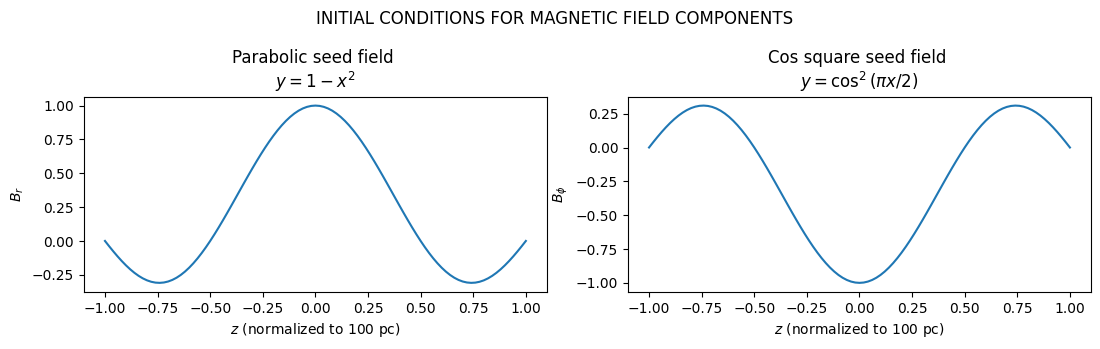

In [5]:
def init_cond_Br(x):
    return (1-x**2)*np.cos(np.pi*x) #(1-x**2)*np.cos(2*np.pi*x)

def init_cond_Bphi(x):
    return -(1-x**2)*np.cos(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)
title_1 = r'Parabolic seed field '+'\n'+r'$ y = 1-x^2$'
title_2 = r'Cos square seed field '+'\n'+r'$ y = \cos^2(\pi x/2)$'
global_title = 'INITIAL CONDITIONS FOR MAGNETIC FIELD COMPONENTS'

plot_init_cond(z, init_cond_Br, init_cond_Bphi, title_1, title_2, global_title)
plt.show()


We have chosen the following parameters



In [11]:
# Constants and parameters
eta_T = 3.48e-3    # magnetic diffusivity
alpha = 0.02    # alpha effect
Omega = 0.4
q = 0.1
t_max = 500     # total simulation time
z_min = -1.0     # minimum thickness of the disc
z_max = 1.0     # thickness of the disc
dt = t_max/200       # time step
dz = 0.01       # spatial step in z direction

# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

# Solve the diffusion equation in radial direction
solution = crank_nicolson_mod(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = solution[:len(z), :]
B_phi = solution[len(z):, :]


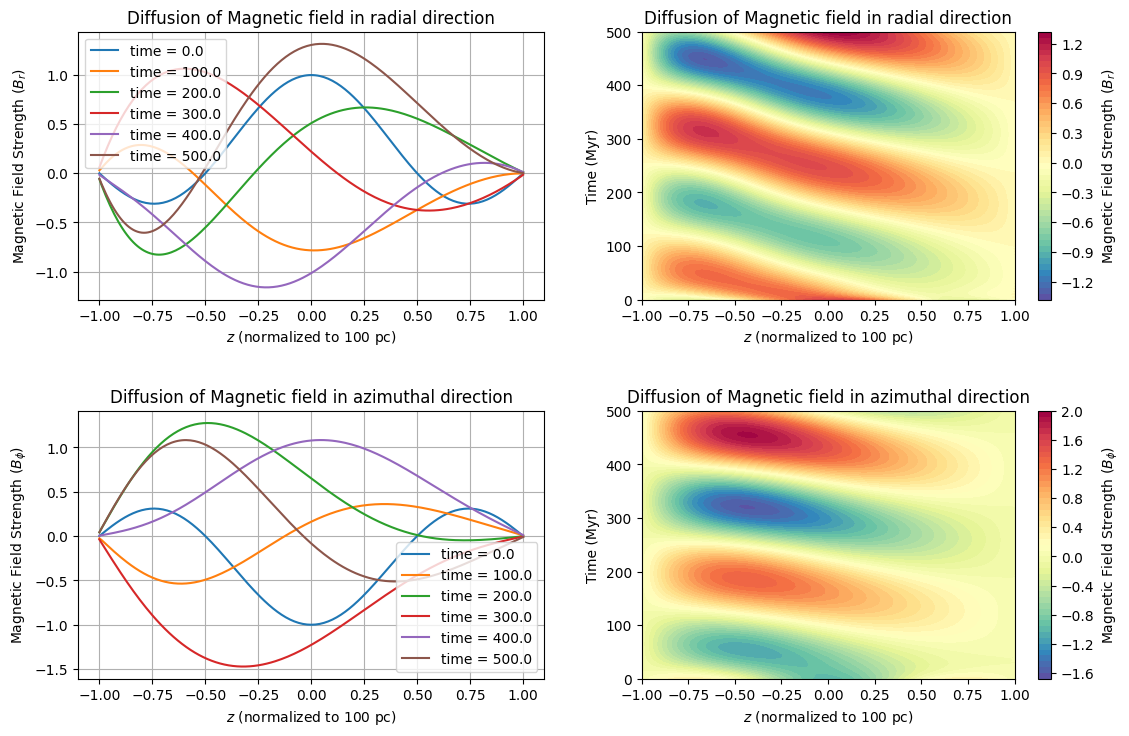

In [12]:
# Plot the solution in imshow
plot_diff(t, z, B_r, B_phi)
plt.show()

Here is an animation showing the evolution of $B_r$ and $B_{\phi}$ with time.

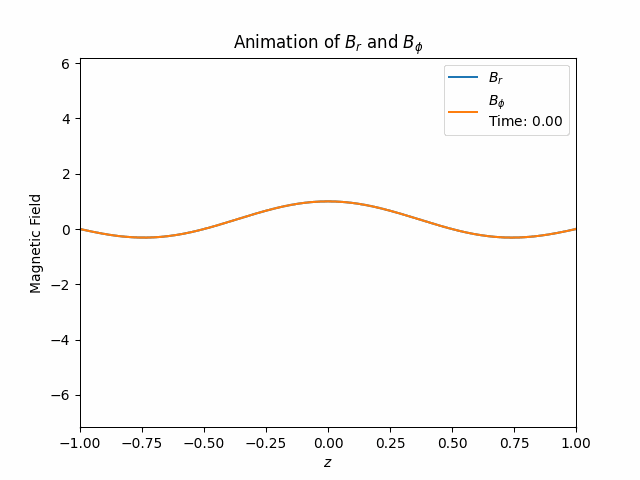
